In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Assuming you've already downloaded and loaded the dataset
data = pd.read_csv('S:/COLLEGE/INTERN/PRODIGY-Machine Learning/PRODIGY_ML_02/Customers.csv')

In [3]:
# Display the first few rows of the dataset
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Select relevant features for clustering (e.g., Annual Income and Spending Score)
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [6]:
# Standardize the features for better performance of K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

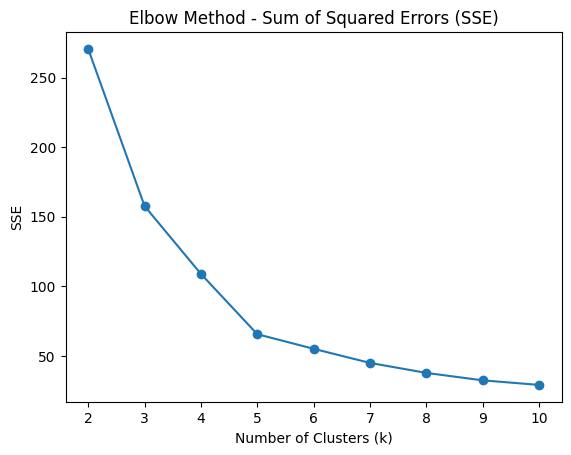

In [7]:
# Hyperparameter optimization using the Elbow Method
# Determine the optimal number of clusters (k)
sse = []

# Trying k values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Sum of Squared Errors (SSE)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method - Sum of Squared Errors (SSE)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

Text(0, 0.5, 'SSE')

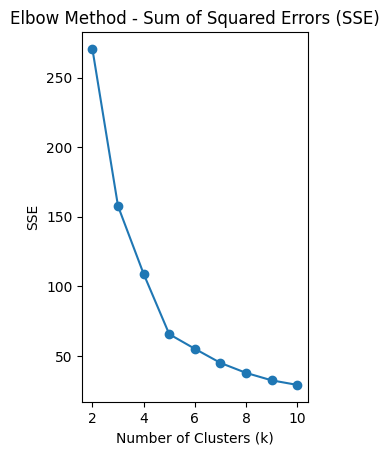

In [8]:
# Plot SSE
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method - Sum of Squared Errors (SSE)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')

In [10]:
# Based on the Elbow Method, choose the optimal number of clusters (k)
optimal_k = 3  # Adjust this based on the visual inspection of the plots

In [11]:
# Apply K-means clustering with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X_scaled)

C:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [12]:
# Add cluster labels to the dataset
data['Cluster'] = kmeans_optimal.labels_

In [13]:
# Display the first few rows of the dataset with the new 'Cluster' column
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


In [14]:
# Save the dataset with the clustering information to a new CSV file
data.to_csv("Mall_Customers_Clustered.csv", index=False)

In [15]:
from IPython.display import FileLink

# Create a download link for the CSV file
FileLink('Mall_Customers_Clustered.csv')

C:\Users\mithu\Mall_Customers_Clustered.csv

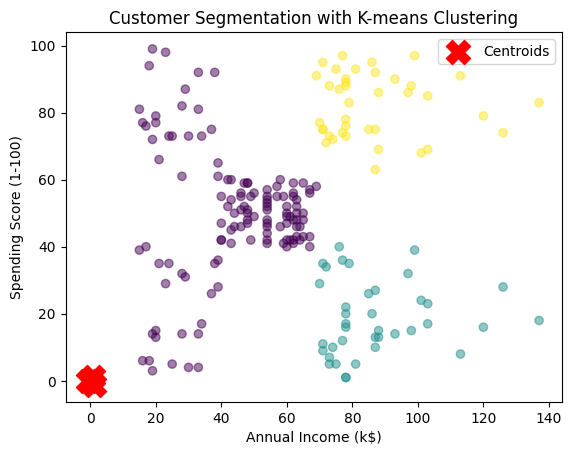

In [16]:
# Visualize the clusters
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation with K-means Clustering')
plt.legend()
plt.show()